# Testing the server

In [1]:
import requests

SERVER_URL = "http://localhost:8000"

def get_root():
    response = requests.get(f"{SERVER_URL}/")
    return response.json()
print(get_root())

{'Hello': 'World'}


# Testing the inference

In [3]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt

# Download latest version
path = kagglehub.dataset_download("oddrationale/mnist-in-csv")
data_train = f"{path}/mnist_train.csv"
df_train = pd.read_csv(data_train)




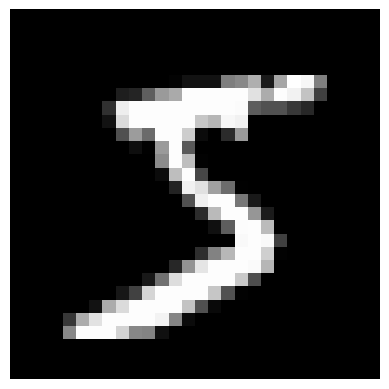

Label: 5


In [6]:
# Visualize some samples
def plot_sample(df):
    # plt.figure(figsize=(12, 12))
    plt.imshow(df.iloc[0, 1:].values.reshape(28, 28), cmap="gray")
    plt.axis("off")
    plt.show()

plot_sample(df_train.iloc[0:1, :])
print("Label:", df_train.iloc[0, 0])

In [15]:
def predict_digit(image_data):
    # Convert the image data to a list
    image_list = image_data.flatten().tolist()
    payload = {"image_data": image_list}
    response = requests.post(f"{SERVER_URL}/predict/", json=payload)
    return response.json()

# Prepare the image data
print(predict_digit(df_train.iloc[0, 1:].values))

{'prediction': 5}
